
<!-- Task Title -->

<div style="background-color: #708090; padding: 20px; border-radius: 10px; box-shadow: 5px 5px 10px #888888;">
  <h1 style="color: white; font-size: 30px; font-weight: bold; text-align: center; text-shadow: 2px 2px 4px #000000;">**Task 17: ML (Clustering Algorithm II)🔍🧩🤖**</h1>
</div>


These tasks cover key aspects of clustering algorithms, including implementation, evaluation, and comparison, providing hands-on experience with K-Means and hierarchical clustering techniques.


**Deadline: 1 August 2024**

.___ __ __ __ __ __ __ __ __

***@Bytewiseltd***
_______________________________________________________________________________________________________________________________

__________________________________________


<!-- <span style="background-color: #1A237E; color: white; padding: 5px; font-weight: bold; font-family: 'Times New Roman', Times, serif; font-style: italic;">~ Moneka</span> -->

<div style="text-align: right;">
    <span style="background-color: #1A237E; color: white; padding: 5px; font-weight: bold; font-family: 'Times New Roman', Times, serif; font-style: italic;">~ Moneka</span>
</div>

_________________________________________

# **Tasks 🔍🧩**

## **Mall Customers Dataset**

## 1. **Implementing K-Means Clustering on Customer Segments** 🛍️

**Task:**
Apply K-Means clustering to segment customers based on their annual income and spending score. Visualize the resulting clusters.

---

## 2. **Finding the Optimal Number of Clusters** 📈

**Task:**
Determine the optimal number of clusters using the Elbow Method and Silhouette Score. Discuss the criteria for selecting the number of clusters.

---

## 3. **Cluster Profiling and Insights** 🔍


**Task:**
Analyze the characteristics of the clusters formed. Provide insights into the customer segments based on their spending behavior and income levels.

---

## 4. **Hierarchical Clustering for Customer Segmentation** 🌲


**Task:**
Implement hierarchical clustering and compare the clusters formed with those obtained from K-Means. Discuss the differences.

---

## 5. **Visualizing Clusters with PCA** 🎨


**Task:**
Apply PCA to reduce the dimensionality of the Mall Customers dataset. Visualize the clusters from both K-Means and hierarchical clustering in the PCA-reduced space.


---

## **Let's get started!**

## Importing Necessary Libraries

In [34]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import LabelEncoder, StandardScaler, normalize
plt.rcParams['figure.figsize'] = (10, 6)
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

## Data Exploration

In [35]:
import requests
from io import StringIO
import pandas as pd

# Define the URL of the dataset (ensure it points to the raw CSV file)
url = 'https://raw.githubusercontent.com/tirthajyoti/Machine-Learning-with-Python/master/Datasets/Mall_Customers.csv'

# Fetch the dataset
response = requests.get(url)

# Load the dataset into a pandas DataFrame
data = StringIO(response.content.decode('utf-8')) # Decode the content
df = pd.read_csv(data)

# Display the first few rows of the DataFrame
display(df.head())

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## Implementing K-Means Clustering on Customer Segments

In [37]:
# Selecting relevant features for Clustering: 'Annual Income (k$)' and 'Spending Score (1-100)'
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
X.head(3)

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6


In [38]:
# Applying K-Means clustering with 5 clusters
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X)  # # df['KCluster'] = kmeans.fit_predict(X)

## Finding the Optimal Number of Clusters

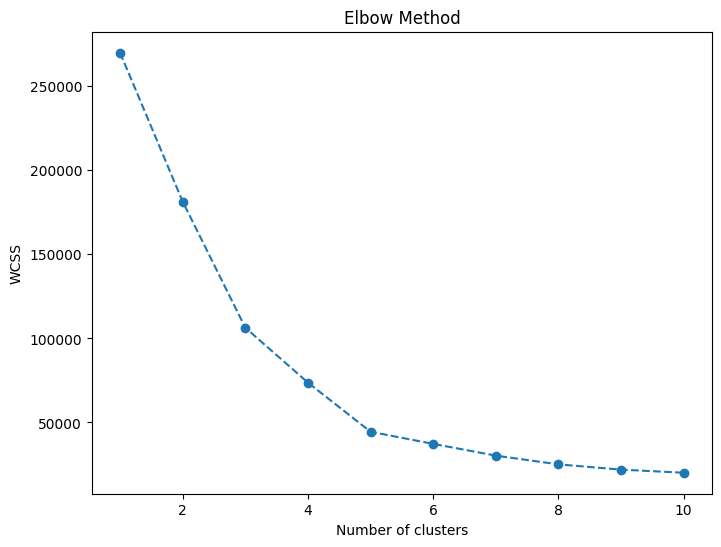

In [39]:
                    # a. Elbow Method

# Calculating WCSS for different numbers of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Average Silhouette Score for 10 clusters: 0.44


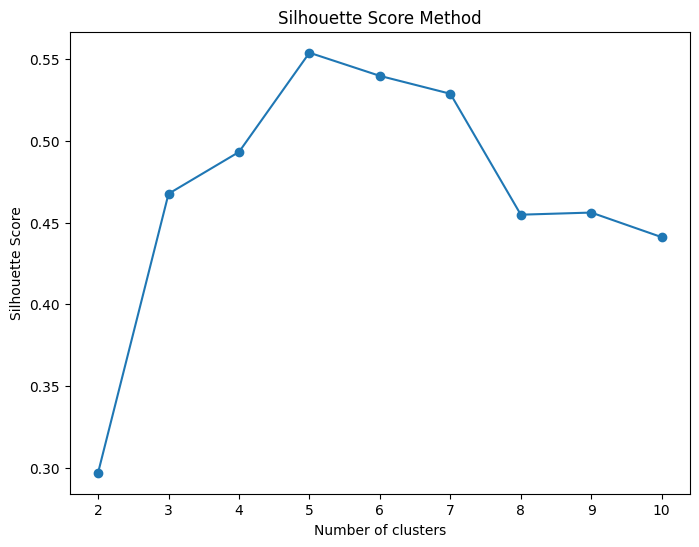

In [40]:
                   # b. Silhouette Score

# Calculating Silhouette Score for different numbers of clusters
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

# Calculating the average silhouette score for the entire dataset
silhouette_avg = silhouette_score(X, kmeans.labels_)
print(f"Average Silhouette Score for {i} clusters: {silhouette_avg:.2f}")

# Plotting the Silhouette Score graph
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [41]:
# Silhouettes samples
# silhouette_avg = silhouette_score(X, kmeans.labels_)
# sample_silhouette_values = silhouette_samples(X, kmeans.labels_)
# sample_silhouette_values

Average Silhouette Score for 5 clusters: 0.55


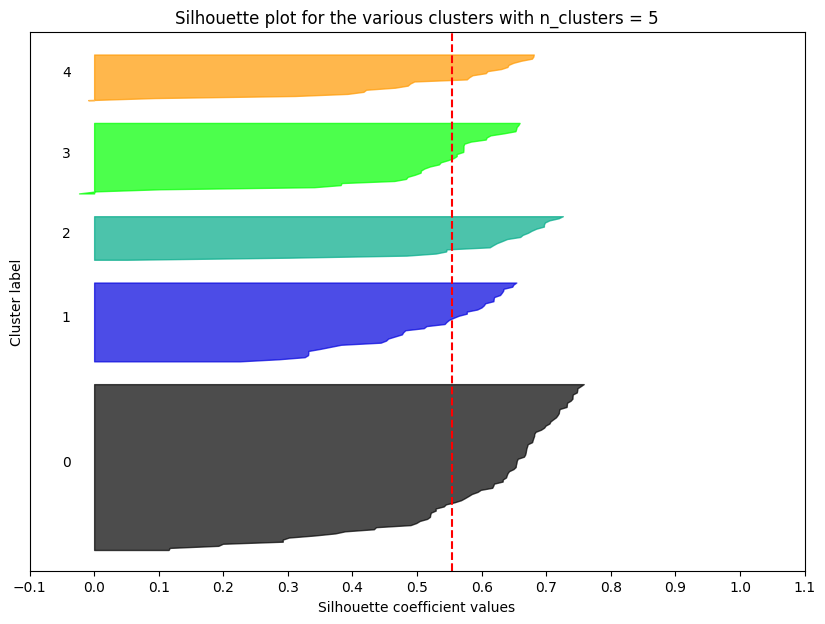

In [42]:
                      # Detailed Analysis
# Number of clusters
n_clusters = 5

# Applying KMeans clustering
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
cluster_labels = kmeans.fit_predict(X)

# Calculating the average silhouette score for the entire dataset
silhouette_avg = silhouette_score(X, cluster_labels)
print(f"Average Silhouette Score for {n_clusters} clusters: {silhouette_avg:.2f}")

# Calculating the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(X, cluster_labels)

# Visualizing the silhouette scores
fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(10, 7)

# Seting up the plot
ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

# Plotting the silhouette scores for each cluster
y_lower = 10
for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    y_lower = y_upper + 10

ax1.set_title(f"Silhouette plot for the various clusters with n_clusters = {n_clusters}")
ax1.set_xlabel("Silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])
ax1.set_xticks(np.arange(-0.1, 1.1, 0.1))

plt.show()

**Interpretation:**

- Most of the clusters have a higher Silhouette Score (close to 1), it indicates good clustering.

- Negative values or scores close to 0 suggest that the data points are on the boundary of two clusters or have been misclassified.

Note: The vertical dashed red line represents the average Silhouette Score. The closer the points are to 1, the better the cluster fits.


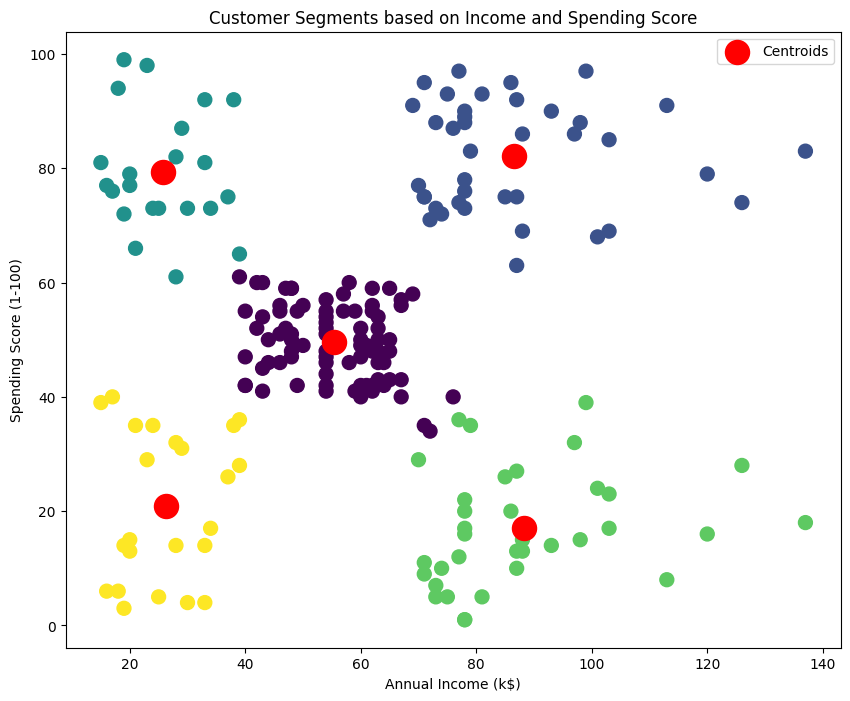

In [43]:
# Plotting/Visualizing the clusters

optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

plt.figure(figsize=(10, 8))
# plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_kmeans,s=100, cmap='rainbow')
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=y_kmeans, cmap='viridis', s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('Customer Segments based on Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

## Cluster Profiling and Insights

In [44]:
# Performing KMeans clustering with the optimal number of clusters (e.g., k=5)
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
# Adding cluster labels to the original dataset
df['KCluster'] = kmeans.fit_predict(X)

# Diplayiing cluster centers
centroids = kmeans.cluster_centers_
print("Cluster Centers:")
print(centroids)

# Analyzing the cluster profiles by calculating the Summary statistics for each clusters
# cluster_profiles = df.groupby('Cluster').mean()   # mean values of each cluster
cluster_profile = df.groupby('KCluster').agg({
    'Annual Income (k$)': ['mean', 'min', 'max'],
    'Spending Score (1-100)': ['mean', 'min', 'max']
})
print("\nCluster Profile:")
print(cluster_profile)

Cluster Centers:
[[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [88.2        17.11428571]
 [26.30434783 20.91304348]]

Cluster Profile:
         Annual Income (k$)          Spending Score (1-100)        
                       mean min  max                   mean min max
KCluster                                                           
0                 55.296296  39   76              49.518519  34  61
1                 86.538462  69  137              82.128205  63  97
2                 25.727273  15   39              79.363636  61  99
3                 88.200000  70  137              17.114286   1  39
4                 26.304348  15   39              20.913043   3  40


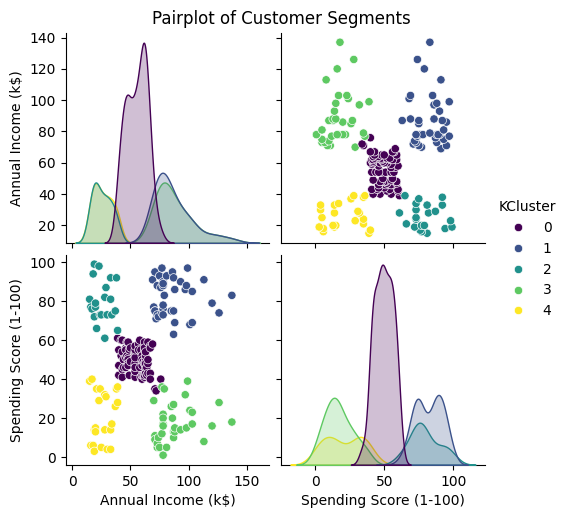

In [45]:
# Pairplot
sns.pairplot(df, hue='KCluster', vars=['Annual Income (k$)', 'Spending Score (1-100)'], palette='viridis')
plt.suptitle('Pairplot of Customer Segments', y=1.02)
plt.show()

In [46]:
# Plotting the clusters
# plt.figure(figsize=(10, 8))
# plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster'], cmap='viridis')
# plt.title('Customer Segments')
# plt.xlabel('Annual Income (k$)')
# plt.ylabel('Spending Score (1-100)')
# plt.colorbar()
# plt.legend()
# plt.show()

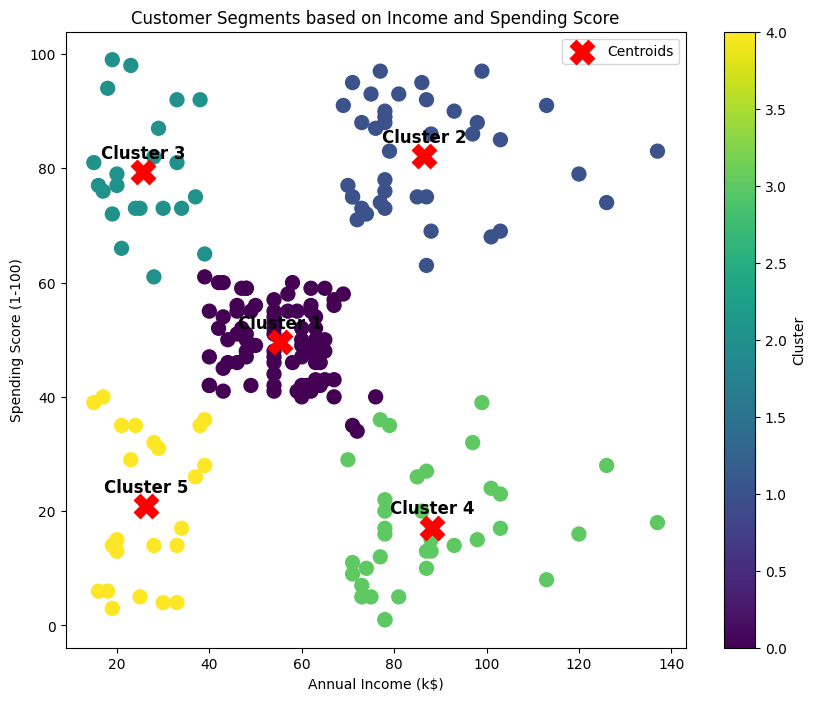

In [47]:
# Plotting the clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['KCluster'], cmap='viridis', s=100)

# Plotting the centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', label='Centroids', marker='X')

# Annotating the centroids with cluster labels
for i, centroid in enumerate(centroids):
    plt.annotate(f'Cluster {i+1}', (centroid[0], centroid[1]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=12, fontweight='bold')

# Adding title and axis labels
plt.title('Customer Segments based on Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

# Adding a colorbar for the clusters
plt.colorbar(scatter, label='Cluster')

# Showing the legend
plt.legend()

# Displaying the plot
plt.show()


**Insights into Customer Segments**

Based on the cluster profiles, we can derive insights into the customer segments:

**Cluster 1:** Moderate income, Mid spending score—value-seeking customers.

**Cluster 2:** High income, high spending score—potential luxury shoppers.

**Cluster 3:** Low income, high spending scores.

**Cluster 4:** High income, low spending scores.

**Cluster 5:** Low income, low spending score—budget-conscious shoppers.


*Insights*

- High Income, High Spending: These customers are likely to spend more on premium products and services. Targeting them with exclusive offers and luxury items might be effective.
- Low Income, Low Spending: These customers are price-sensitive and might respond better to discounts and budget-friendly options.
- Moderate Income, Mid Spending: This segment is likely to be budget-conscious but still open to making purchases that offer a good balance between quality and affordability. They are attracted to products or services that provide reliable value without stretching their budget too far.

## Hierarchical Clustering for Customer Segmentation

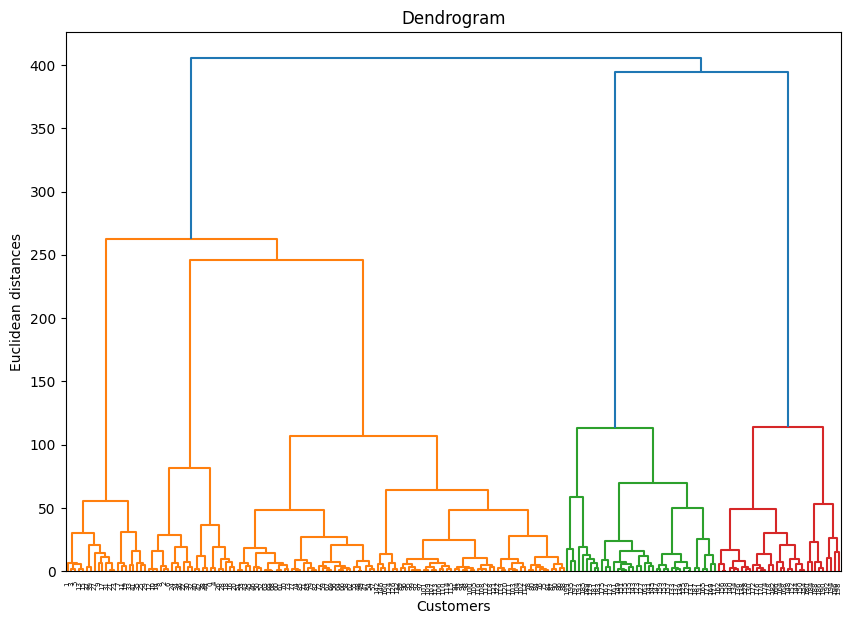

In [48]:
# Implementing Hierarchical Clustering

# Dendrogram to find the optimal number of clusters
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

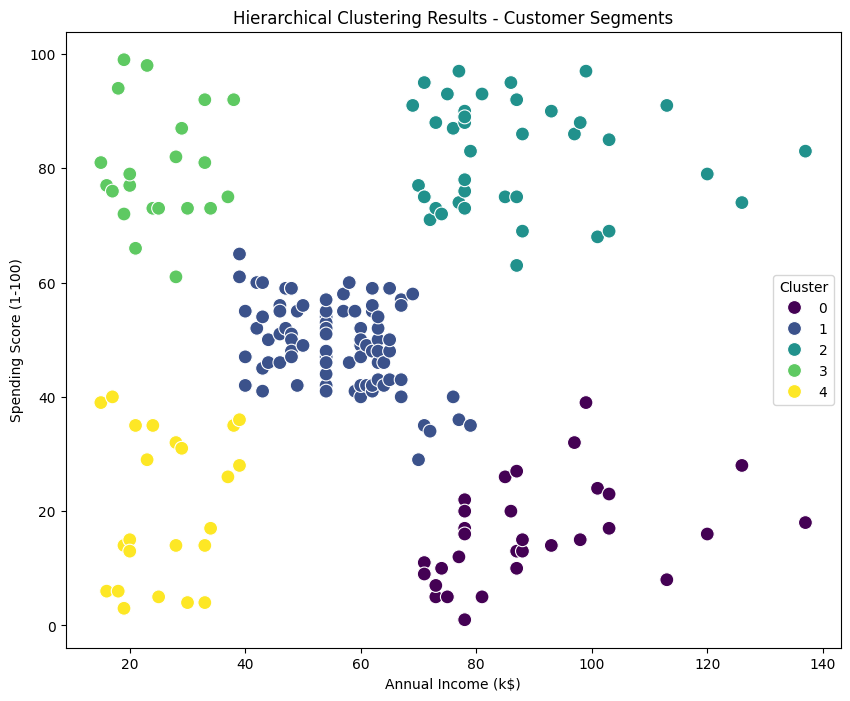


Hierarchical Cluster Profiling:
         Annual Income (k$)          Spending Score (1-100)        
                       mean min  max                   mean min max
Hcluster                                                           
0                 89.406250  71  137              15.593750   1  39
1                 55.811765  39   79              49.129412  29  65
2                 86.538462  69  137              82.128205  63  97
3                 25.095238  15   38              80.047619  61  99
4                 26.304348  15   39              20.913043   3  40


In [49]:
# Fitting Hierarchical Clustering with a chosen number of clusters (e.g., 5)
optimal_clusters = 5
hc = AgglomerativeClustering(n_clusters=optimal_clusters, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)   # df['Hierarchical_Cluster'] = hierarchical.fit_predict(X)
df['Hcluster'] = y_hc     # adds the cluster labels to the original dataset


# Plotting Hierarchical Clustering results
plt.figure(figsize=(10, 8))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df['Hcluster'], palette='viridis', s=100)
plt.title('Hierarchical Clustering Results - Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

# Summary statistics for each hierarchical cluster
h_cluster_profile = df.groupby('Hcluster').agg({
    'Annual Income (k$)': ['mean', 'min', 'max'],
    'Spending Score (1-100)': ['mean', 'min', 'max']
})
print("\nHierarchical Cluster Profiling:")
print(h_cluster_profile)

##  Compare K-Means and Hierarchical Clustering

To compare clusters, we can use visualization and metrics to assess the similarity between K-Means and Hierarchical Clustering results.





>**Note:**


>K-Means Clustering:

    - Clusters are created by partitioning the data into k clusters based on distance to the centroids.
    - Tends to form spherical clusters.
    - Requires specifying the number of clusters in advance.


>Hierarchical Clustering:

      - Builds a hierarchy of clusters using either agglomerative or divisive methods.
      - Does not require specifying the number of clusters upfront (though you specify a cut-off in the dendrogram or use a predefined number of clusters).
      - Can capture more complex cluster shapes compared to K-Means.



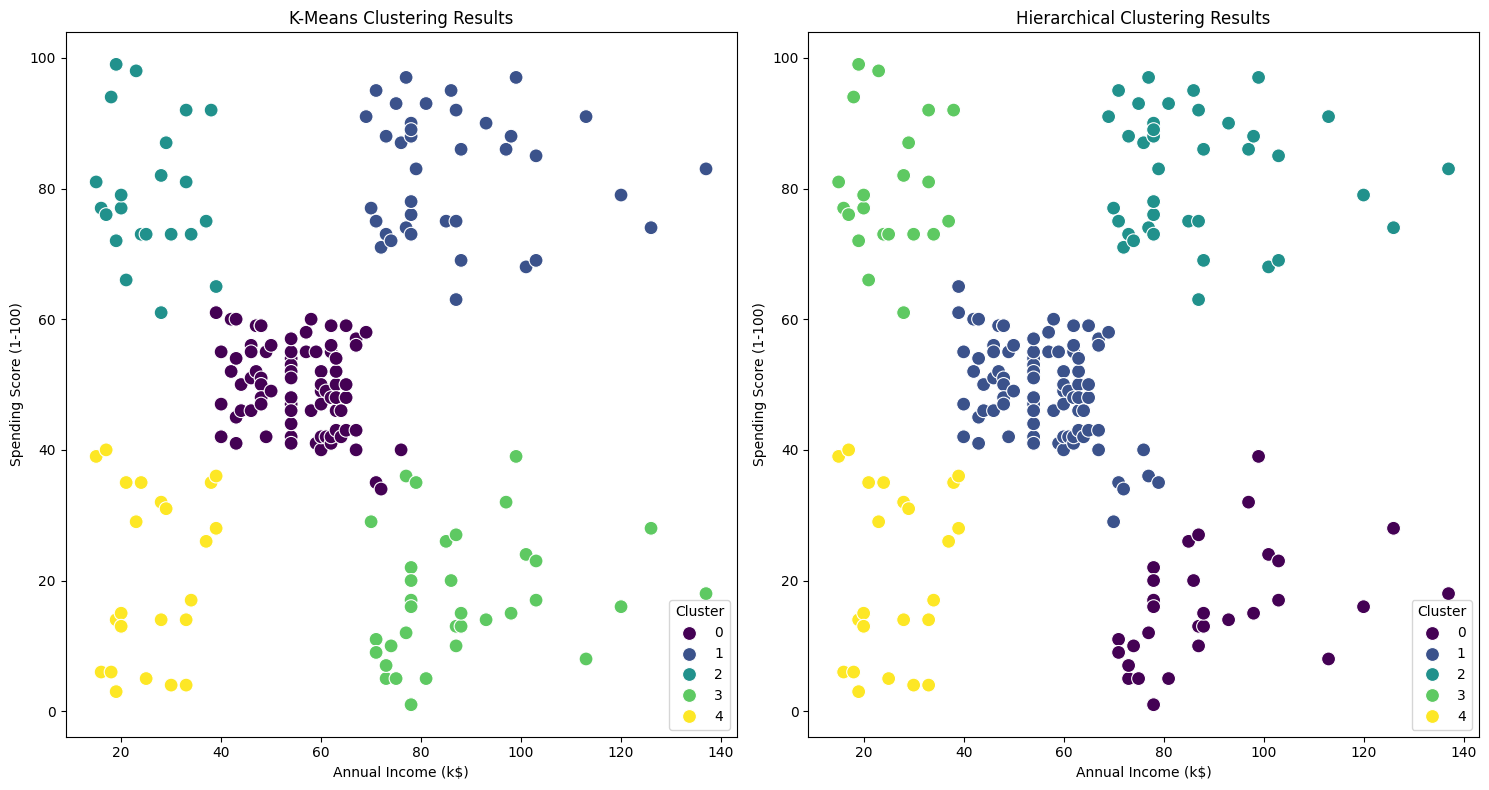

In [50]:
# Comparison Visualization:

# Plot K-Means clustering results
plt.figure(figsize=(15, 8))

# Subplot for K-Means Clustering
plt.subplot(1, 2, 1)
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df['KCluster'], palette='viridis', s=100)
plt.title('K-Means Clustering Results')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')

# Subplot for Hierarchical Clustering
plt.subplot(1, 2, 2)
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df['Hcluster'], palette='viridis', s=100)
plt.title('Hierarchical Clustering Results')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')

plt.tight_layout()
plt.show()

**Discussion of Differences:**


**Observations:**

- The K-Means algorithm has segmented the customers into distinct groups based on their annual income and spending score.

- The clusters are generally compact, reflecting the K-Means algorithm's tendency to create spherical, well-separated clusters.


- Hierarchical Clustering has also segmented the data into similar clusters, but there are noticeable differences in how the data points are grouped.

- This difference indicates that Hierarchical Clustering may capture different patterns in the data, leading to more elongated or non-spherical clusters.


In this particular case, if the goal is to segment customers based on spending habits and income for targeted marketing, K-Means might be the preferred method because of its clear and distinct clusters. However, if you want to explore the underlying data structure more thoroughly, Hierarchical Clustering offers valuable insights into how different customers are related at a deeper level.


## Visualizing Clusters with PCA

In [51]:
X_0 = df[['Age',	'Annual Income (k$)',	'Spending Score (1-100)']]
X_0

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [52]:
# Initializing PCA and reduce the data to 2 dimensions
pca = PCA(n_components=2)
pca.fit_transform(X_0)

# Adding PCA results to the DataFrame
# X_0['PCA1'] = pca.components_[0]
# X_0['PCA2'] = pca.components_[1]

# Creating a new DataFrame
PCA_ds = pd.DataFrame(pca.transform(X_0), columns=(["PCA1","PCA2"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
PCA1,200.0,-3.410605e-15,26.462508,-66.315657,-12.575075,-2.912417,10.662125,72.448826
PCA2,200.0,0.000000e+00,26.159704,-62.107294,-11.680488,-2.898739,9.860800,79.375146


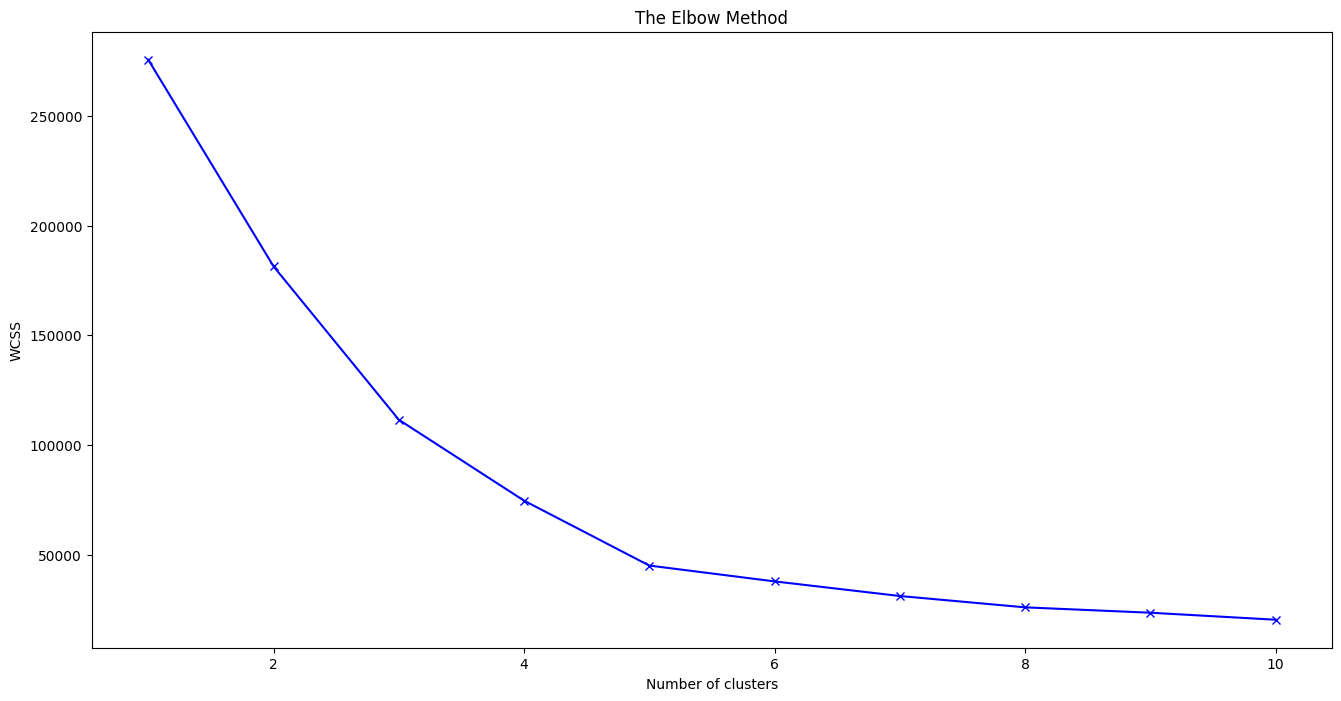

In [53]:
# Elbow Method
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(PCA_ds)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(16,8))
plt.plot(range(1,11),wcss, 'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [54]:
# Initiating K-Means Clustering model
kmeans = KMeans(n_clusters=5)
# Fitting model and predict clusters
kmeans_labels = kmeans.fit_predict(PCA_ds)
PCA_ds["KMeans_Cluster"] = kmeans_labels
# Adding the Clusters feature to the orignal dataframe.
X_0["Cluster_KMeans"]= kmeans_labels

# Initiating the Agglomerative Clustering model
AC = AgglomerativeClustering(n_clusters=5, linkage='ward')
# Fitting model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)   # ac_labels
PCA_ds["Hierarchical_Cluster"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
X_0["Cluster_Agglo"]= yhat_AC + 1

In [55]:
PCA_ds.head()

,PCA1,PCA2,KMeans_Cluster,Hierarchical_Cluster
0,-31.870508,-33.001425,4,4
1,0.763397,-56.843865,0,3
2,-57.408726,-13.122936,4,4
3,-2.169896,-53.477905,0,3
4,-32.174920,-30.387005,4,4


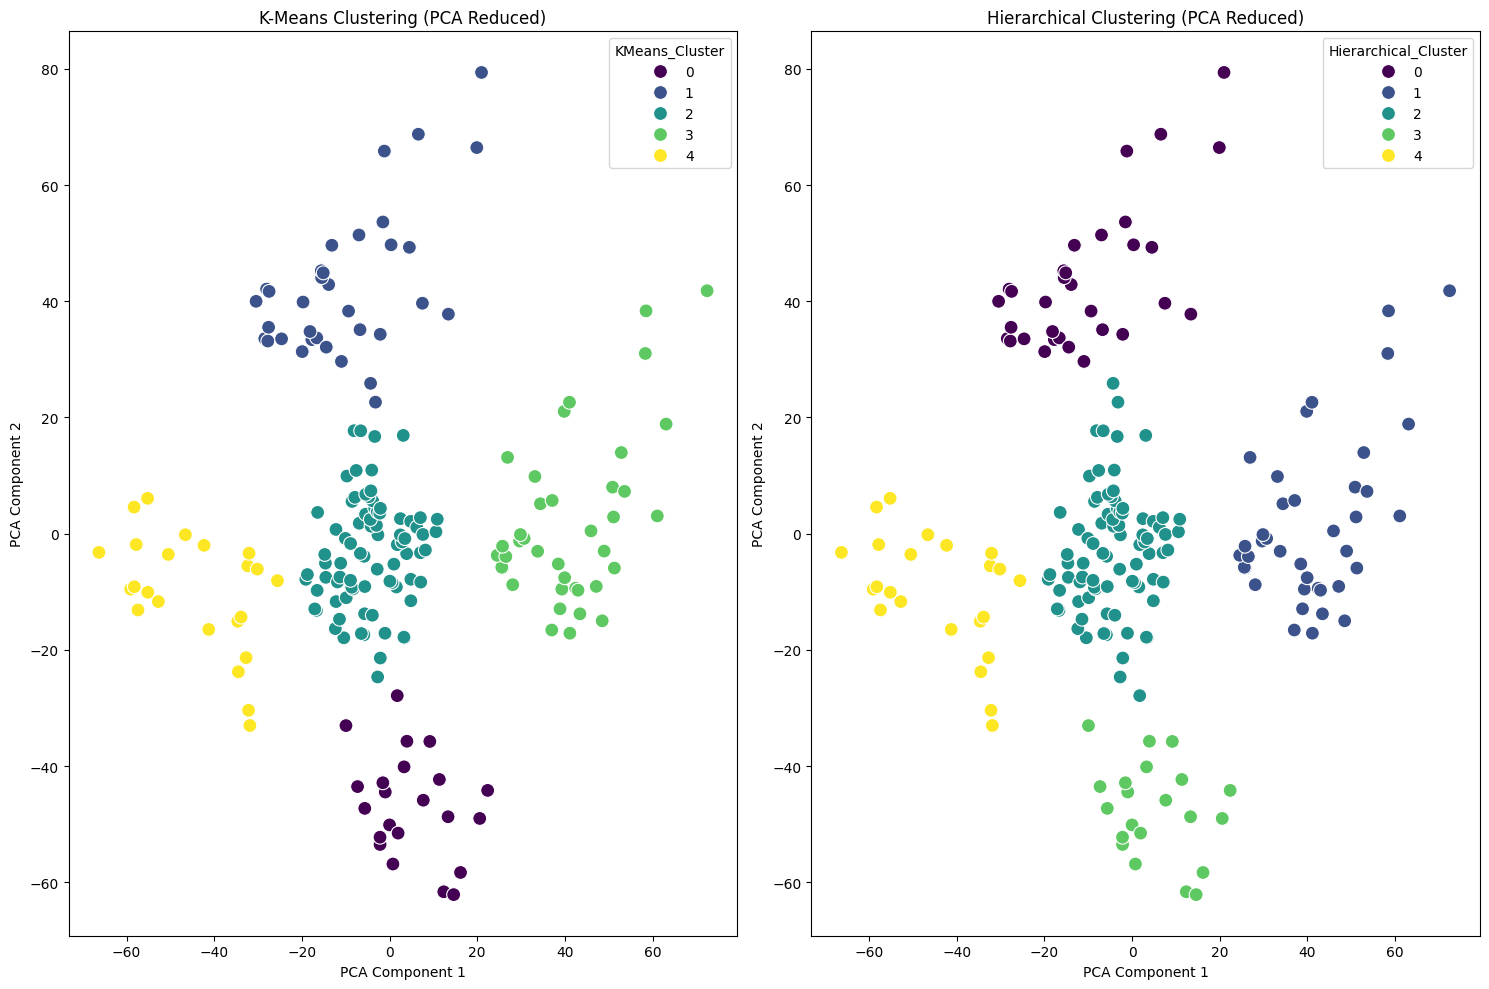

In [56]:
# Visualizing the Clusters in PCA-Reduced Space

# Set up the plot
plt.figure(figsize=(15, 10))

# Plot K-Means clusters
plt.subplot(1, 2, 1)
sns.scatterplot(x=PCA_ds['PCA1'], y=PCA_ds['PCA2'], hue=PCA_ds['KMeans_Cluster'], palette='viridis', s=100)    # plt.scatter(PCA_ds[:, 0], PCA_ds[:, 1], c=kmeans_labels)
plt.title('K-Means Clustering (PCA Reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Plot Hierarchical clusters
plt.subplot(1, 2, 2)
sns.scatterplot(x=PCA_ds['PCA1'], y=PCA_ds['PCA2'], hue=PCA_ds['Hierarchical_Cluster'], palette='viridis', s=100)
plt.title('Hierarchical Clustering (PCA Reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

plt.tight_layout()
plt.show()

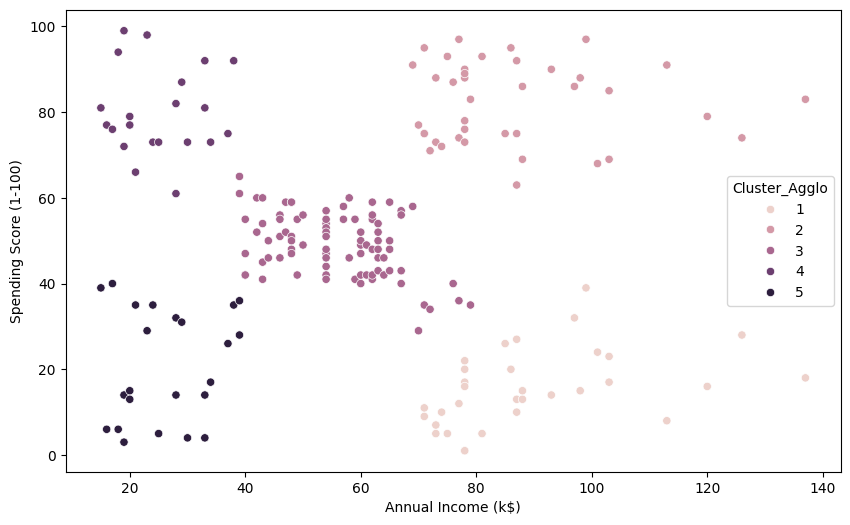

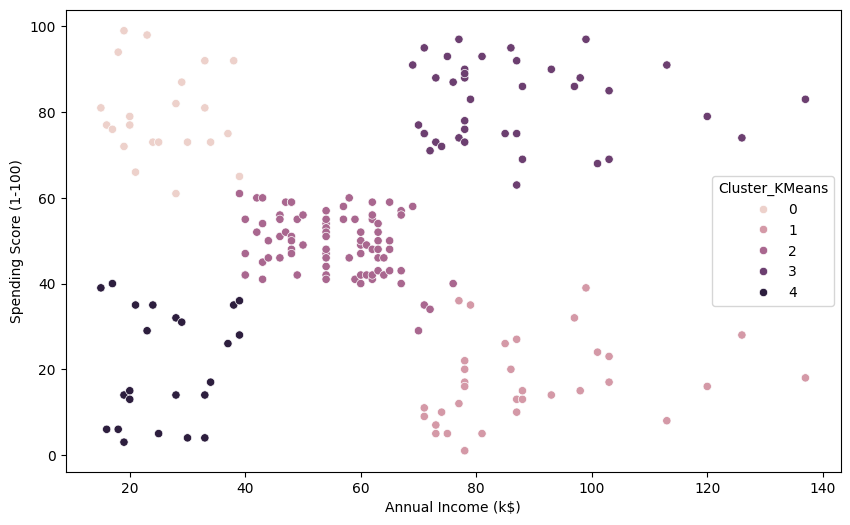

In [57]:
# For Original Dataset:-
# Use keyword arguments and the data parameter
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster_Agglo', data=X_0)
plt.show()
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster_KMeans', data=X_0)
plt.show()

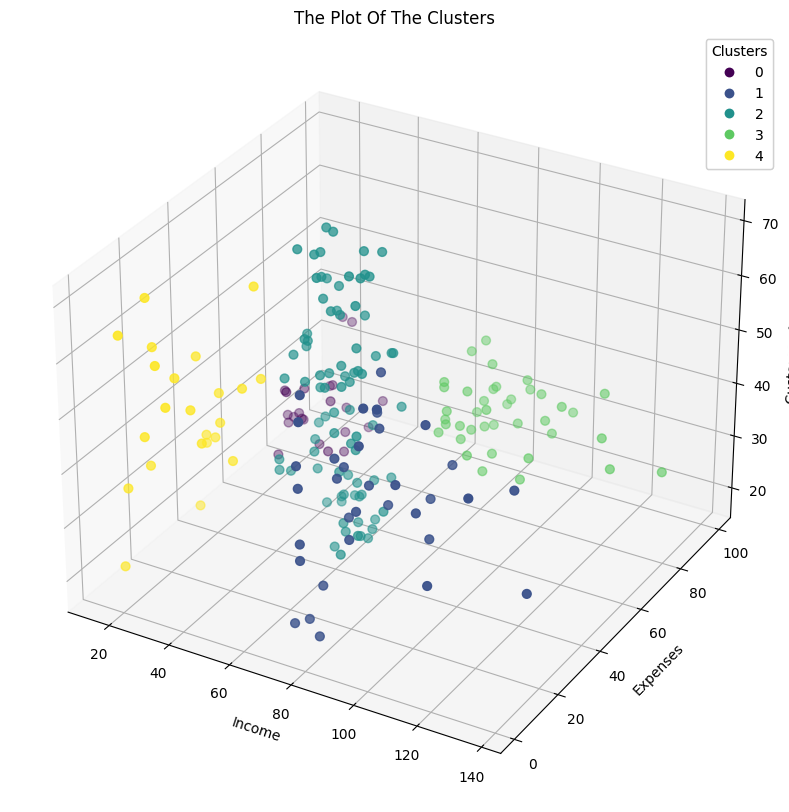

In [58]:
# Taking X_0 and PCA_ds that are properly defined previously

x = X_0['Annual Income (k$)']
y = X_0['Spending Score (1-100)']
z = X_0['Age']

clusters = PCA_ds["KMeans_Cluster"]   # X_0['Cluster_Kmeans']

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')  # Creates a 3D subplot

# Scatter plot
scatter = ax.scatter(x, y, z, s=40, c=clusters, marker='o', cmap='viridis')

# Labeling
ax.set_xlabel('Income')
ax.set_ylabel('Expenses')
ax.set_zlabel('Customer Age')

# Legend
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

# Title
ax.set_title("The Plot Of The Clusters")

plt.show()

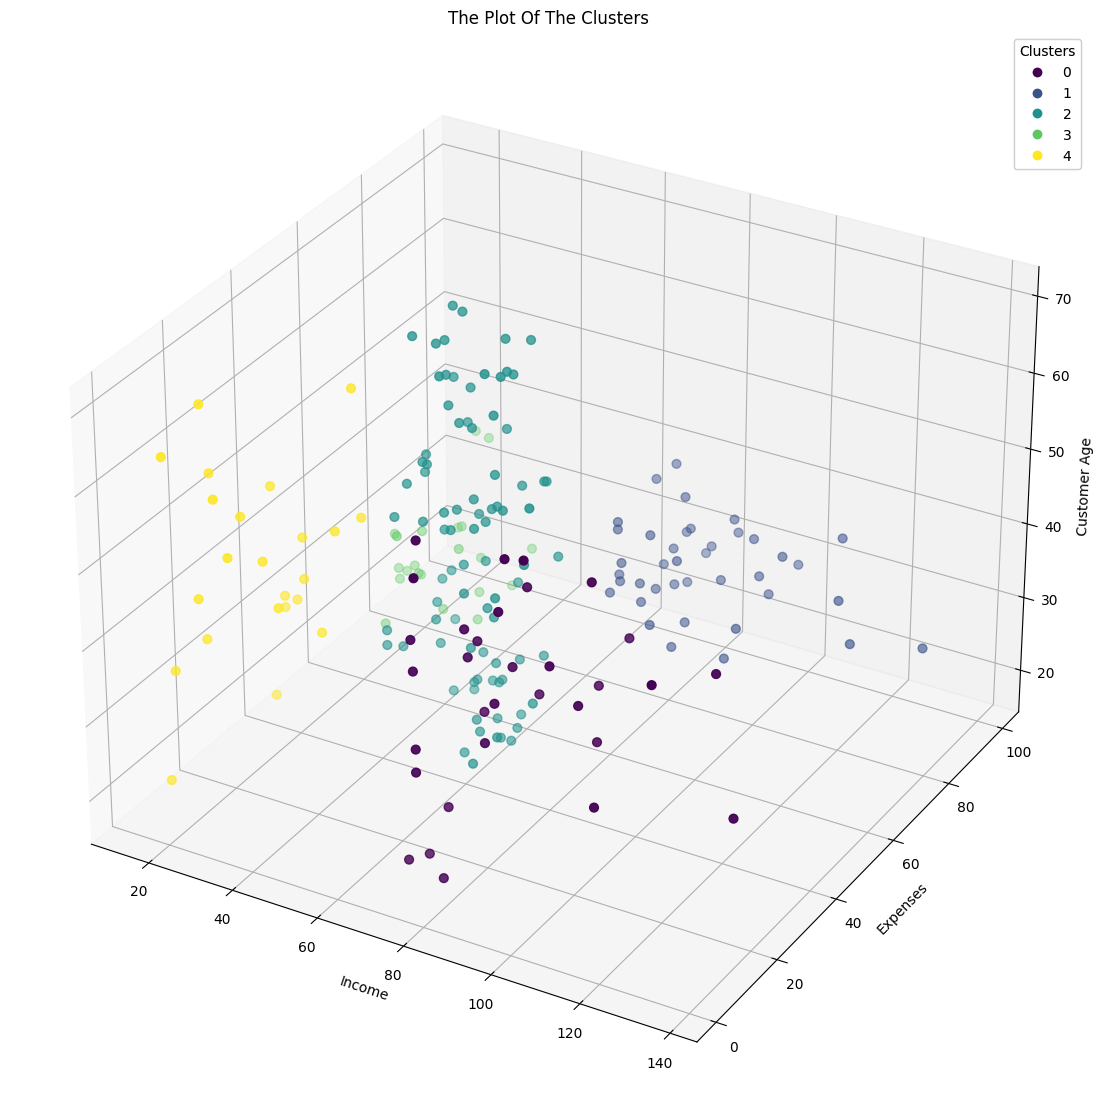

In [59]:
x = X_0['Annual Income (k$)']
y = X_0['Spending Score (1-100)']
z = X_0['Age']

fig = plt.figure(figsize=(16, 14))
ax = plt.subplot(111, projection='3d')
ax.scatter(x, y, z, s=40, c=PCA_ds["Hierarchical_Cluster"], marker='o')

# Labeling
ax.set_xlabel('Income')
ax.set_ylabel('Expenses')
ax.set_zlabel('Customer Age')

# Legend
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

# Title
ax.set_title("The Plot Of The Clusters")
plt.show()



---

---



